**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

(stats-estimators)=
# Statistics and general parameter estimation








## Statistics

```{prf:definition}
:label: statistic-def

Let $\bX$ be a $k$-dimensional random vector. A _($d$-dimensional) statistic_ is a random vector of the form

$$
T = r(\bX),
$$

where $r:\bbr^k \to \bbr^d$ is a vector-valued function. An observed value $t$ of $T$ is called an _observed statistic_ or _empirical statistic_.
```

If we conceptualize the random vector $\bX$ as (theoretical) data, then a statistic is simply a function of the data. Crucially important examples of statistics include those defined as follows:

```{prf:definition}
:label: sample-mean-var-def

Let $\bX = (X_1,\ldots,X_m)$ be an $m$-dimensional random vector. The _sample mean_ is defined to be the statistic

$$
\overline{X} \def \frac{1}{m}(X_1+\cdots+X_m),
$$

while the _sample variance_ is defined to be the statistic

$$
S^2 \def \frac{1}{m-1} \sum_{i=1}^m(X_i - \overline{X})^2.
$$

The corresponding empirical statistics are the _empirical mean_ and _empirical variance_ defined as

$$
\overline{x} \def \frac{1}{m}(x_1+\cdots+x_m) \quad \text{and} \quad s^2 = \frac{1}{m-1} \sum_{i=1}^m(x_i - \overline{x})^2.
$$

```

Very often, the component random variables $X_1,\ldots,X_m$ of the random vector $\bX$ in the definition are assumed to form a random sample, i.e., an IID sequence of random variables. The dimension $m$ is then referred to as the _sample size_. In principle, then, the sample size $m$ can be _any_ positive integer, and so it is often convenient to write $\overline{X}_m$ for the sample mean, explicitly displaying the sample size. This gives us an entire _infinite sequence_ of sample means:

$$
\overline{X}_1,\overline{X}_2,\ldots,\overline{X}_m, \ldots.
$$ (seq-means-eqn)

Since statistics are random vectors, they have their own probability distributions. These are given special names:

```{prf:definition}
:label: samp-dist-def

The probability distribution of a statistic $T$ is called the _sampling distribution_ of $T$.
```

The sampling distributions for sample means $\overline{X}_m$ are particularly important, and one of the main goals of {numref}`Chapter %s <asymptotic>` is to study the limiting behavior (or _asymptotic behavior_) of the sampling distributions in the sequence {eq}`seq-means-eqn` as $m\to \infty$.

In general, however, computing the sampling distributions is difficult. But if we actually have _observed_ data $x_1,x_2,\ldots,x_m$, then (as you will explore in the programming assignment) there is a resampling method known as _bootstrapping_ that yields  approximations to sampling distributions. An example is given by the histogram (with KDE) on the right-hand side of the following figure, where a histogram (with KDE) of the empirical distribution of an observed dataset is given on the left-hand side:

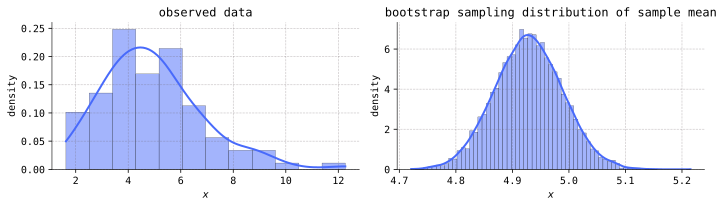

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib_inline.backend_inline
import matplotlib.colors as clr
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings("ignore")
blue = '#486AFB'
magenta = '#FD46FC'

np.random.seed(42)
X = sp.stats.gamma(a=5)

sample_size = 100
resample_size = 1000
random_sample = X.rvs(size=sample_size)
replicate_means = []
num_resamples = 10000

for _ in range(num_resamples):
    sample = np.random.choice(a=random_sample, size=resample_size, replace=True)
    replicate_means.append(sample.mean())

_, axes = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(x=random_sample, ec='black', stat='density', kde=True, ax=axes[0])
sns.histplot(x=replicate_means, ec='black', stat='density', kde=True, ax=axes[1])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('density')
axes[0].set_title('observed data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('density')
axes[1].set_title('bootstrap sampling distribution of sample mean')
plt.tight_layout()

Observe that the sampling distribution on the right-hand side appears to be well approximated by a normal distribution. This is actually a manifestation of the asymptotic behavior of sample means that we alluded to above; indeed, as we will see in {numref}`Chapter %s <asymptotic>`, the Central Limit Theorem tells us that the sequence {eq}`seq-means-eqn` of sample means converges (in distribution) to a normal distribution as $m\to \infty$, provided that the random variables are IID. This is true even though the observed data are definitely _not_ normally distributed. Moreover, the mean of the sampling distribution is approximately $4.924$, while the mean of the observed data is approximately $4.928$. The fact that these means are nearly equal is a consequence of another theorem in {numref}`Chapter %s <asymptotic>` called the Law of Large Numbers. These asymptotic results provide the foundation for the large-sample _confidence intervals_ that we will construct in {numref}`Chapter %s <CIs>`.

Let's consider the sample mean a little closer:

```{prf:theorem} Properties of the sample mean
:label: prop-sample-mean-thm

Let $X_1,\ldots,X_m$ be an IID random sample from a distribution with mean $\mu$ and standard deviation $\sigma$.

1. The expectation of the sample mean $\overline{X}$ is $\mu$.
2. The variance of the sample mean $\overline{X}$ is $\sigma^2/m$, and hence its standard deviation is $\sigma/\sqrt{m}$.
3. If the $X_i$'s are normally distributed, then so too is the sample mean $\overline{X}$.
```

You will prove this theorem as







## General parametric models

Abstracting away all the intricate particularities of the fully-observed probabilistic graphical models in {numref}`Chapter %s <prob-models>` reveals that they all are examples of the following type of general structure:

```{prf:definition}
:label: gen-para-model-def

Let $\bX$ be a $k$-dimensional random vector and let $\Omega$ be a (nonempty) subset of a Euclidean space $\bbr^d$. A _parametric probabilistic model_ (or simply a _parametric model_) for $\bX$ is a specification of a dependence of the probability distribution of $\bX$ on values $\btheta \in \Omega$. In other words, a _parametric model_ is simply a family

$$
\calP_0 = \{P_\btheta : \btheta \in \Omega\}
$$ (para-model-eqn)

of probability distributions on $\bbr^k$ such that $\bX \sim P_\btheta$. In this context, the set $\Omega$ is called the _parameter space_, each $\btheta \in \Omega$ is called a ($d$-dimensional) _parameter_, and the vector $\bX$ is called the _data_.
```

Very often, we shall specify a parametric model {eq}`para-model-eqn` by listing the density functions of the probability measures $P_\btheta$, provided that these exist. In other words, we will write

$$
\calP_0 = \{ p(\bx; \btheta): \btheta \in \Omega\}.
$$

The simplest examples of parametric models are the univariate models introduced and studied in {numref}`Chapter %s <examples>`. Indeed, if we have $X \sim \Ber(\theta)$, then

$$
\mathcal{P}_0 = \{ p(x;\theta) : \theta \in [0,1] \}, \quad p(x;\theta) = \theta^x (1-\theta)^{1-x}, \ x\in \{0,1\},
$$

is a parametric model with $1$-dimensional parameter space $\Omega = [0,1]$. Similarly, if we have $X\sim \calN(\mu,\sigma^2)$, then

$$
\mathcal{P}_0 = \{ p(x;\btheta) : \btheta = (\mu,\sigma^2) \in \bbr \times (0,\infty) \}, \quad p(x;\btheta) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left[ -\frac{1}{2\sigma^2} (x-\mu)^2\right],
$$

is a parametric model with $2$-dimensional parameter space $\Omega = \bbr \times (0,\infty)$.

As we mentioned above, all the fully-observed probabilistic graphical models studied in {numref}`Chapter %s <prob-models>` are examples of this general type of parametric model. For example, a linear regression model with $n$-dimensional predictor vector $\bX$ and response variable $Y$ defines a parametric model

$$
\calP_0 = \{ p(\bx, y; \btheta) : \btheta = (\beta_0,\bbeta,\sigma^2) \in \bbr \times \bbr^n \times (0,\infty)\}
$$

with $(n+2)$-dimensional parameter space $\Omega = \bbr \times \bbr^n \times (0,\infty)$ and where

$$
p(\bx, y; \btheta) = p(y \mid \bx; \btheta) p(\bx) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left[ -\frac{1}{2\sigma^2} (y-\beta_0 - \bx^\intercal \bbeta)^2\right] p(\bx).
$$

In this latter example, notice that the $(n+1)$-dimensional random vector $(\bX,Y)$ plays the roll of the vector $\bX$ in {prf:ref}`para-model-def` (so that $k=n+1$).

The "plated" versions of the fully-observed PGMs in {numref}`Chapter %s <prob-models>` also define parametric models in the sense of {prf:ref}`para-model-def`. For example, a "plated" version of our linear regression model from above would define the parametric model

$$
\calP_0 = \{ p(\bx_1,\ldots,\bx_m,y_1,\ldots,y_m; \btheta) : \btheta = (\beta_0,\bbeta,\sigma^2) \in \Omega\}
$$

where $\Omega$ is the same parameter space as above and where

\begin{align*}
p(\bx_1,\ldots,\bx_m,y_1,\ldots,y_m; \btheta) &= p(y_1,\ldots,y_m \mid \bx_1,\ldots,\bx_m) p(\bx_1,\ldots,\bx_m) \\
&= \left\{\prod_{i=1}^m \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left[ -\frac{1}{2\sigma^2} (y_i-\beta_0 - \bx_i^\intercal \bbeta)^2\right]\right\} p(\bx_1,\ldots,\bx_m).
\end{align*}

In this case, the $(mn + m)$-dimensional random vector $(\bX_1,\ldots,\bX_m,y_1,\ldots,y_m)$ plays the roll of the vector $\bX$ in {prf:ref}`para-model-def` (so that $k=mn+m$).















## Parameter estimators

```{prf:definition}
:label: para-model-def

Let $\calP_0$ be a parametric model for a $k$-dimensional random vector $\bX$ with $d$-dimensional parameter space $\Omega$. A _parameter estimator_ (or simply an _estimator_) is a statistic

$$
\hatbtheta = \delta(\bX),
$$

where $\delta: \bbr^k \to \bbr^d$ is a vector-valued function. An observed value of $\hatbtheta$ is called a _point estimate_.
```

There will be much abuse of terminology and notation regarding parameter estimators; it seems wise, then, to formally issue the following:

```{warning}

1. Following our previously established convention of representing random objects with capital letters, we _should_ write a parameter estimator as $\widehat{\boldsymbol \Theta}$, where $\boldsymbol\Theta$ is a capital theta. However, this is notationally awkward, so we will not do this.
2. Though technically the parameter estimator is the random vector $\hatbtheta$, we will use the word _estimator_ to also refer to the function $\delta$. Moreover, we will often use the notations $\hatbtheta$ and $\delta$ interchangeably.
3. To complicate things even more, we will sometimes write $\hatbtheta$ to refer to a point estimate.
```

Thus, the single piece of notation $\hatbtheta$ might stand for one of three things: Either the random vector $\delta(\bX)$, the function $\delta$, or an observed value of the random vector $\delta(\bX)$. You will need to rely on context to determine which of these three objects is meant when you encounter the symbol $\hatbtheta$.















## Blah

So far, the only method that we have for estimating (or learning) the parameter vector $\btheta$ of a probabilistic model is the method of _maximum likelihood estimation_ that we studied in detail in {numref}`Chapter %s <learning>`. However, as we will see in the present chapter, there are _other_ methods for parameter estimation. The general paradigm in which we shall study these methods begins with the following fundamental definition:

```{prf:definition}
:label: param-est-def

Let $\bX$ be a $k$-dimensional random vector whose probability distribution is parametrized by a $d$-dimensional parameter vector $\btheta$. Then a _parameter estimator_ (or simply an _estimator_) is a function

$$
\delta: \bbr^k \to \bbr^d, \quad \bx \mapsto \delta(\bx).
$$

If we plug in the random vector $\bX$, we obtain a $d$-dimensional random vector

$$
\hatbtheta \ \def \ \delta( \bX ).
$$ (yup-eqn)

An observed value of the random vector $\hatbtheta$ is called a _parameter estimate_.
```

It will very often be the case that $\bX$ is a random vector of the form

$$
\bX = ( \bY^{(1)},\ldots,\bY^{(m)}),
$$

where each $\bY^{(i)}$ is an $n$-dimensional random vector (so $k=mn$) that make up an IID random sample whose common distribution is parametrized by a parameter vector $\btheta$. By independence, the probability function of $\bX$ is then given by the product

$$
p(\bx;\btheta) = \prod_{i=1}^m p(\by^{(i)}; \btheta), \quad \bx = (\by^{(1)},\ldots,\by^{(m)}),
$$

where $p(\by^{(i)};\btheta)$ is the probability function of $\bY^{(i)}$.

Before continuing, I need to warn you of (many) upcoming abuses of notation and terminology:



With the warning properly issued, let's move on.

First, we note that maximum likelihood estimation defines a parameter estimator denoted $\bthetaMLE$. Indeed, supposing that $\bx^{(1)},\ldots,\bx^{(m)}$ is an observation of an IID random sample with data likelihood function

$$
\mathcal{L}(\btheta;\bx^{(1)},\ldots,\bx^{(m)}) \def p(\bx^{(1)},\ldots,\bx^{(m)}; \btheta) = \prod_{i=1}^m p(\bx^{(i)};\btheta),
$$

we define

$$
\bthetaMLE = \argmax_{\btheta\in \bbr^d} \mathcal{L}(\btheta;\bx^{(1)},\ldots,\bx^{(m)}),
$$

provided that a _unique_ maximizing argument exists. The single acroynm _MLE_ will stand either for the particular estimate $\bthetaMLE$, in which case it stands for _maximum likelihood estimate_, or it will stand for the obtained estimator (function), in which case it stands for _maximum likelihood estimator_. You will need to rely on context to clarify the intended meaning when this acroynm is encountered.

Notice that {prf:ref}`param-est-def` is _extremely_ general. Even though we write $\hatbtheta = \delta(\bX)$, there really does not have to be any _a priori_ connection between $\delta$ and $\btheta$ for the former to be called an estimator of the latter. In fact, $\delta$ might be a constant function which outputs a single vector for _all_ choices of input; in all but very trivial cases, such an "estimator" does a terrible job of estimating the true value of the parameter.

An example will help clarify matters. Suppose that we have a simple univariate binomial model $X \sim \Bin(100,\theta)$ for some unknown parameter $\theta \in (0,1)$. It is not difficult to show that the maximum likelihood estimate is given by $\thetaMLE = x/100$. However, the two formulas

$$
\hattheta_1 = \frac{x + 5}{106} \quad \text{and} \quad \hattheta_2 = \frac{x + 1}{106}
$$ (bin-map-eqn)

also define legitimate estimators for $\theta$, at least according to {prf:ref}`param-est-def`. They might seem to have been pulled out of the blue, but as we will see below, they are both examples of _maximum a posteriori_ estimators and (as the name suggests) they were obtained as solutions to an optimization problem similar to the MLE.

An entire infinite universe full of potential parameter estimators calls for a method for _comparing_ estimators. One such method goes through the following objects:

```{prf:definition}
:label: loss-func-def

A _loss function_ is a real-valued function

$$
L: \bbr^d \times \bbr^d \to \bbr, \quad (\btheta,\ba) \mapsto L(\btheta, \ba).
$$
```

In our present context, loss functions serve as metrics for the quality of a parameter estimate. The vector $\ba$ is conceptualized as an estimate of a parameter $\btheta$, and the value $L(\btheta,\ba)$ is the "loss incurred" in the estimation. Very often we have $L(\btheta,\ba)\geq 0$ for all inputs, and the smaller the loss the better the estimate.

In particular, we may plug an estimator $\delta$ directly into a loss function to obtain values $L\big(\btheta, \delta(\bx)\big)$. This number is the loss incurred when we estimate the particular parameter value $\btheta$ using $\delta$ and the observed value $\bx$. However, this is only a "local" measure of the performance of the estimator $\delta$ evaluated on just a single observation $\bx$ and parameter vector $\btheta$. In order to obtain a "global" measure of the performance of $\delta$, we may average over all observations of the dataset. This leads us to:

```{prf:definition}
:label: freq-risk-def

Let $\btheta$ be a parameter vector, $L$ a loss function, and $\delta$ a parameter estimator. Then the _risk_ associated with $\delta$ (relative to $L$) is given by

$$
R(\btheta,\delta) \def E\big[ L\big(\btheta, \delta(\bX) \big)\big], 
$$

where the expectation is taken with respect to the probability function $p(\bx;\btheta)$.

```

So, we might hope to compare and rank parameter estimators by comparing their risks (with respect to some fixed loss function). But there's a problem, because risks are technically _functions_ of the parameter $\btheta$, and functions may not always be linearly ranked since their graphs might cross. For example, let's return to our binomial model $X\sim \Bin(100,\theta)$ and the three parameter estimators

$$
\thetaMLE = \frac{x}{100}, \quad \hattheta_1 = \frac{x + 5}{106} \quad \text{and} \quad \hattheta_2 = \frac{x + 1}{106}.
$$ 


One very common loss function is the _squared error loss_ given by

$$
L:\bbr \times \bbr \to \bbr, \quad L(\theta,a) = (\theta-a)^2.
$$

With respect to this loss, the risks of the three estimators are given by

$$
R(\theta,\thetaMLE) = \frac{\theta (1 - \theta)}{100},
$$

and

$$
R(\theta,\hattheta_1) = \frac{25 + 8 \theta (5 - 8 \theta)}{11236} \quad \text{and} \quad R(\theta,\hattheta_2) = \frac{1 + 8  \theta (11 - 8 \theta)}{11236}.
$$

If we plot these risks, we get:

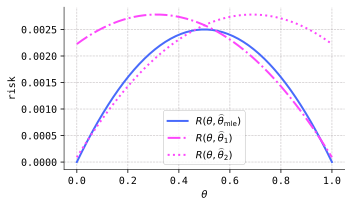

In [2]:
def risk_mle(theta):
    return theta * (1 - theta) / 100

def risk_1(theta):
    return (25 + 8 * theta * (5 - 8 * theta)) / 11236

def risk_2(theta):
    return (1 + 8 * theta * (11 - 8 * theta)) / 11236

grid  = np.linspace(0, 1)
plt.plot(grid, risk_mle(grid), label='$R(\\theta,\widehat{\\theta}_{\\text{mle}})$')
plt.plot(grid, risk_1(grid), label='$R(\\theta,\widehat{\\theta}_1)$', linestyle='dashdot')
plt.plot(grid, risk_2(grid), color=magenta, label='$R(\\theta,\widehat{\\theta}_2)$', linestyle='dotted')
plt.gcf().set_size_inches(5, 3)
plt.xlabel('$\\theta$')
plt.ylabel('risk')
plt.legend()
plt.tight_layout()

Notice that there is no way to linearly rank these risks. For any one of them, there are certain parameter values where that risk is smaller than the others, while for other parameter values, it is larger. In particular:

* For $\theta=0.5$, the MLE is less risky (on average) compared to the other two.
* For $\theta=0.75$ the estimator $\hattheta_1$ is less risky (on average) than the other two.
* For $\theta=0.25$ the estimator $\hattheta_2$ is less risky (on average) than the other two.

The squared error loss is one of the most common loss functions; two other common losses are called the _absolute error loss_ and _0/1 loss_. These are all defined officially in:

```{prf:definition}
:label: loss-example-def

Let $\delta$ be a parameter estimator.

1. The loss function

    $$
    L:\bbr \times \bbr \to \bbr, \quad L(\theta,a) = (\theta-a)^2,
    $$

    is called the _squared error loss_. The risk of $\delta$ associated with this loss is called the _mean squared error_ and is denoted $\MSE(\delta)$.

2. The loss function

    $$
    L:\bbr \times \bbr \to \bbr, \quad L(\theta,a) = |\theta-a|,
    $$

    is called the _absolute error loss_. The risk of $\delta$ associated with this loss is called the _mean absolute error_ and is denoted $\MAE(\delta)$.

3. The loss function

    $$
    L:\bbr^d \times \bbr^d \to \bbr, \quad L(\btheta,\ba) = \begin{cases} 0 & : \btheta = \ba, \\ 1  & : \btheta \neq \ba, \end{cases}
    $$

    is called the _0/1 loss_.
```

Observe that the notations $\MSE(\delta)$ and $\MAE(\delta)$, while descriptive, hide the fact that both of these risks are functions of the parameter $\theta$.

Another example of "crossing risks" is given in:

```{admonition} Problem Prompt
Do problem 1 on the worksheet.
```









## Bayesian models

```{margin}

If the parameter vector $\btheta$ is random, then following our previously established convention, we should write it as a capital Greek theta $\boldsymbol\Theta$. However, we will not do this.
```

In some sense, the parameter estimation and comparison scheme described in the previous section does not align well with real world practice. For example, in computing the risk $R(\btheta,\delta)$ of an estimator $\delta$, we average over all possible observations of the dataset. But in real life, the dataset is often _fixed_, and we may not be particularly concerned with the performance of our estimator on datasets other than the one in our hands. An alternate way to approach parameter estimation and comparison conceptualizes the dataset as fixed, while taking the parameter vector $\btheta$ as a random vector itself. This latter conceptual scheme is called _Bayesian modeling_.

The Bayesian scheme also allows parameter estimation methods that produce more than just simple numerical estimates, the latter often called _point estimates_ in this context. Indeed, Bayesian parameter estimation produces an entire probability distribution for each parameter, called the _posterior distribution_ of the parameter, which are conditioned on the observed dataset. From these latter distributions, we may extract point estimates such as the (posterior) means, medians, and modes. However, it is really the full posterior distributions that are of most interest.

In order to obtain these posterior distributions, which are obtained as the _end result_ of Bayesian parameter estimation, we need to _begin_ with initial distributions on the parameters called _prior distributions_. The work that goes into cooking up the prior distributions is the price we pay to use Bayesian modeling. The prior distributions reflect our prior knowledge (hence the name) of the parameters heading into the problem, and entire chapters in textbooks devoted to Bayesian statistics concern best practices for selecting good prior distributions. We will only barely mention some of these ideas. In any case, no matter how the prior distributions are chosen, the mathematical mechanism that carries us from the prior to the posterior distributions via the dataset is exactly Bayes' Theorem.

Mathematically, the transition from the probabilistic graphical models described in {numref}`Chapter %s <prob-models>` to Bayesian ones is incredibly easy: All you do is treat each parameter as an unobserved random variable or vector. For example, remember that the underlying graph of a linear regression model is given by

```{image} ../img/lin-reg-00.svg
:width: 50%
:align: center
```
&nbsp;

To turn this into a Bayesian linear regression model, we simply do this:

```{image} ../img/lin-reg-bayes.svg
:width: 60%
:align: center
```
&nbsp;

For our very simple univariate binomial model $X\sim \Bin(100, \theta)$ in the previous section, we would consider the following graph:

```{image} ../img/bern-bayes.svg
:width: 35%
:align: center
```
&nbsp;

In this latter example, we might suppose that $X$ counts the number of heads in $100$ flips of a coin that shows heads with probability $\theta$. We might even imagine that we are in the scenario described in {numref}`untrustworthy`, where we are playing a coin flipping game with an untrustworthy friend: If the coin shows heads, our friend wins; otherwise, we win. Our suspicion that our friend is untrustworthy and that the coin prefers heads with probability $\theta>0.5$ could be encoded by using the prior distribution

$$
\theta \sim \Beta(6,2),
$$

so that the prior mean of $\theta$ is $0.75$. Carrying through the same computations in {numref}`untrustworthy` using Bayes' Theorem, we see that the _posterior distribution_ of the parameter has probability function $p(\theta| x)$ given (on its support) by

$$
p(\theta | x) = \frac{p(x|\theta) p(\theta)}{p(x)} \propto \theta^{x + 5} (1-\theta)^{101 - x}.
$$

In particular, the posterior distribution is $\Beta(x + 6, 102 - x)$. If we want to obtain a point estimate for the parameter from the posterior distribution, we may take the posterior mode (global maximizer) which is easily seen to be

$$
\thetaMAP \def \argmax_{\theta \in \bbr} p(\theta | x) =  \frac{x + 5}{106}.
$$

Note that this is exactly the point estimate $\hattheta_1$ described above in {eq}`bin-map-eqn`. As we mentioned there, this point estimate is called a _maximum a posteriori_ (_MAP_) estimate.

```{admonition} Problem Prompt
Do problem 2 on the worksheet.
```










## Bayes estimators

In the Bayesian framework, a new type of risk becomes the central object of interest:

```{prf:definition}
:label: bayes-risk-def

Let $\btheta$ be a random parameter vector, $L$ be a loss function, and $\delta$ a parameter estimator. Then the _posterior risk_ associated with $\delta$ (relative to $L$) is given by

$$
R(\btheta,\delta \mid \bX = \bx ) \def E\big[ L\big(\btheta, \delta(\bx) \big) \mid \bX = \bx\big], 
$$

where the expectation is taken with respect to the posterior probability function $p(\btheta | \bx)$.
```

In contrast to the risk $R(\btheta,\delta)$, which is a function of $\btheta$, notice that the posterior risk is a function of $\bx$ where the dependence on $\btheta$ has been averaged out. This means that for a fixed dataset, the posterior risks associated with different estimators are real numbers instead of functions, and thus may be linearly ranked. In principle, then, we can always choose the optimal estimator in the Bayesian framework simply by choosing the one with the smallest posterior risk. These optimal estimators have names:

```{prf:definition}
:label: bayes-estimator-def

Let $\btheta$ be a random parameter vector and $L$ a loss function. The function

$$
\delta^\ast(\bx) \def \argmin_{\ba \in \bbr^d}  E\big[ L(\btheta, \ba ) \mid \bX = \bx \big]
$$

is called a _Bayes estimator_ of $\btheta$, where the expectation is taken with respect to the posterior probability function $p(\btheta | \bx)$.
```

For certain loss functions, the Bayes estimators have particularly nice descriptions in terms of summary statistics of the posterior distributions.

```{prf:theorem} Common Bayes estimators
:label: bayes-estimator-example-thm

Let $\btheta$ be a random parameter.

1. With respect to the squared error loss, the Bayes estimator is the posterior mean, given explicitly as the conditional expectation
    
    $$
    \delta^\ast(\bx) = E(\theta \mid \bX = \bx).
    $$

2. With respect to the absolute error loss, the Bayes estimator is a posterior median.

3. With respect to the 0/1 loss, the Bayes estimator is a posterior mode, i.e., a _maximum a posterior_ estimator $\thetaMAP$.
```

```{prf:proof}

For simplicity, let's suppose for all three statements that the posterior distribution is discrete, so that we must minimize the objective function

$$
J(a) \def E\big[ L(\theta, a ) \mid \bX = \bx \big] = \sum_{\theta \in \bbr} L(\theta,a) p(\theta | \bx).
$$

Wherever the loss function is differentiable with respect to $a$, we have

$$
J'(a) = \sum_{\theta \in \bbr} \frac{\partial}{\partial a}\big(L(\theta,a)\big) p(\theta | \bx).
$$

In particular, if $L(\theta,a) = (\theta-a)^2$, then

$$
J'(a) = -2 E(\theta \mid \bX = \bx) +2a.
$$

Setting this to $0$ and solving for $a$ gives the global minimizer $a = E(\theta \mid \bX = \bx)$.

If $L$ is the 0/1 loss, then we have

$$
J(a) = \sum_{\theta\neq a} p(\theta | \bx).
$$

If $a^\star$ is a posterior mode so that

$$
a^\star = \argmax_{a\in \bbr} p(a | \bx),
$$

then we will have $J(a^\star) \leq J(a)$ for all $a\in \bbr$ if and only if $p(a|\bx) \leq p(a^\star|\bx)$. But this last inequality holds by our choice of $a^\star$.

Finally, if $L$ is the absolute error loss, then you may refer to Theorem 4.5.3 in {cite}`DeGrootSchervish2014` for a proof. Q.E.D.

```